# Seminario de proyectos II 

## Unidad 2. Actividad 2B. Reporte. Aplicación de las herramientas de preprocesamiento

#### Claudio Daniel Pacheco Castro

### Introducción<br>
El presente documento muestra el desarrollo de la descarga de información así como de la limpieza de la misma para poder contar con datos que, posteriormente, se puedan utilizar para la definición de un modelo de clasificación.
### Desarrollo de la actividad<br>
#### Importar las librerías necesarias

In [7]:
#Importar librerías
import pandas as pd
import os
import zipfile
import shutil
import ee
import requests
import zipfile
import io
from matplotlib import pyplot as plt

El primer paso consiste en definir el directorio de trabajo y, dentro de este, el de descarga de información.

In [8]:
#Definir directorio de trabajo
#Directorio de trabajo. Si existe directorio D:/, se selecciona si no, C:/
try:
    os.chdir('D:/github/proyecto_infotec')
except:
    os.chdir('C:/users/claudio.pacheco/Documents/Github/proyecto_infotec')
#if os.path.exists('D:/'):
#    os.chdir('D:/github/proyecto_infotec')
#else:
#    os.chdir('C:/users/claudio.pacheco/Documents/Github/proyecto_infotec')

In [9]:
#crear directorio de salida
if not os.path.exists('datos'):
    os.makedirs('datos')

### Descarga de información a nivel manzana

Una vez definido el directorio y creada la carpeta de descarga, se procede a descargarla la información del INEGI. Para este caso, se utilizan los datos del Censo de Población y Vivienda 2020 a nivel manzana.

In [10]:
#URL básica para descarga de archivos
url_basica="https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/ageb_manzana/ageb_mza_urbana_"

Con la URL básica, se obtiene la información de cada una de las entidades federativas:

In [11]:
# #Descargar archivos y descomprimir archivos

# for entidad in range(1,33):
#     #Si existe el archivo, no se descarga
#     if os.path.exists("datos/conjunto_de_datos_ageb_urbana_01_cpv2020.csv"):
#         pass
#     else:
#         if entidad<10:
#             url=url_basica+"0"+str(entidad)+"_cpv2020_csv.zip"
#         else:
#             url=url_basica+str(entidad)+"_cpv2020_csv.zip"
        
# #Descargar archivo
#         os.system("curl -o datos/entidad_"+str(entidad)+".zip "+url)
# #Descomprimir archivo
#         with zipfile.ZipFile("datos/entidad_"+str(entidad)+".zip","r") as zip_ref:
#             zip_ref.extractall("datos")
# #Eliminar archivo zip
#         os.remove("datos/entidad_"+str(entidad)+".zip")

In [12]:
# #Sacar de la carpeta conjunto_de_datos el archivo csv de cada entidad
# for entidad in range(1,33):
#     if entidad<10:
#         shutil.move("datos/ageb_mza_urbana_0"+str(entidad)+"_cpv2020/conjunto_de_datos/conjunto_de_datos_ageb_urbana_0"+str(entidad)+"_cpv2020.csv","datos/conjunto_de_datos_ageb_urbana_0"+str(entidad)+"_cpv2020.csv")
#     else:
#         shutil.move("datos/ageb_mza_urbana_"+str(entidad)+"_cpv2020/conjunto_de_datos/conjunto_de_datos_ageb_urbana_"+str(entidad)+"_cpv2020.csv","datos/conjunto_de_datos_ageb_urbana_"+str(entidad)+"_cpv2020.csv")

In [13]:
# #Eliminar las carpetas del directorio de trabajo si existen
# for entidad in range(1,33):
#     if entidad<10:
#         if os.path.exists("datos/ageb_mza_urbana_"+"0"+str(entidad)+"_cpv2020"):
#             shutil.rmtree("datos/ageb_mza_urbana_"+"0"+str(entidad)+"_cpv2020")
#     else:
#         if os.path.exists("datos/ageb_mza_urbana_"+str(entidad)+"_cpv2020"):
#             shutil.rmtree("datos/ageb_mza_urbana_"+str(entidad)+"_cpv2020")

Al finalizar la descarga y descompresión de la información, se procede a unir los archivos en uno solo:

In [14]:
#Pegar todos los archivos csv en una sola data frame
df=pd.DataFrame()
for entidad in range(1,33):
    if entidad<10:
        df_temp=pd.read_csv("datos/conjunto_de_datos_ageb_urbana_"+"0"+str(entidad)+"_cpv2020.csv",encoding='utf-8', low_memory=False)
    else:
        df_temp=pd.read_csv("datos/conjunto_de_datos_ageb_urbana_"+str(entidad)+"_cpv2020.csv",encoding='utf-8', low_memory=False)
    df=pd.concat([df,df_temp],axis=0)
    print("Se ha agregado la entidad "+str(entidad)," a la dataframe")

#Imprimir el número de registros con separadores de miles
print("Se concluyó la concatenación. El conjunto de datos cuenta con "+str(df.shape[1])+" columnas y "+str("{:,}".format(df.shape[0]))+" registros")
df.columns=df.columns.str.lower()
#Eliminar todos los archivos csv de la carpeta datos
#archivos=[x for x in os.listdir('datos') if x.endswith('.csv')]
#for archivo in archivos:
#    os.remove("datos/"+archivo)    

Se ha agregado la entidad 1  a la dataframe
Se ha agregado la entidad 2  a la dataframe
Se ha agregado la entidad 3  a la dataframe
Se ha agregado la entidad 4  a la dataframe
Se ha agregado la entidad 5  a la dataframe
Se ha agregado la entidad 6  a la dataframe
Se ha agregado la entidad 7  a la dataframe
Se ha agregado la entidad 8  a la dataframe
Se ha agregado la entidad 9  a la dataframe
Se ha agregado la entidad 10  a la dataframe
Se ha agregado la entidad 11  a la dataframe
Se ha agregado la entidad 12  a la dataframe
Se ha agregado la entidad 13  a la dataframe
Se ha agregado la entidad 14  a la dataframe
Se ha agregado la entidad 15  a la dataframe
Se ha agregado la entidad 16  a la dataframe
Se ha agregado la entidad 17  a la dataframe
Se ha agregado la entidad 18  a la dataframe
Se ha agregado la entidad 19  a la dataframe
Se ha agregado la entidad 20  a la dataframe
Se ha agregado la entidad 21  a la dataframe
Se ha agregado la entidad 22  a la dataframe
Se ha agregado la e

In [15]:
#Mostrar todos los nombres de las columnas
print(df.columns.tolist())

['entidad', 'nom_ent', 'mun', 'nom_mun', 'loc', 'nom_loc', 'ageb', 'mza', 'pobtot', 'pobfem', 'pobmas', 'p_0a2', 'p_0a2_f', 'p_0a2_m', 'p_3ymas', 'p_3ymas_f', 'p_3ymas_m', 'p_5ymas', 'p_5ymas_f', 'p_5ymas_m', 'p_12ymas', 'p_12ymas_f', 'p_12ymas_m', 'p_15ymas', 'p_15ymas_f', 'p_15ymas_m', 'p_18ymas', 'p_18ymas_f', 'p_18ymas_m', 'p_3a5', 'p_3a5_f', 'p_3a5_m', 'p_6a11', 'p_6a11_f', 'p_6a11_m', 'p_8a14', 'p_8a14_f', 'p_8a14_m', 'p_12a14', 'p_12a14_f', 'p_12a14_m', 'p_15a17', 'p_15a17_f', 'p_15a17_m', 'p_18a24', 'p_18a24_f', 'p_18a24_m', 'p_15a49_f', 'p_60ymas', 'p_60ymas_f', 'p_60ymas_m', 'rel_h_m', 'pob0_14', 'pob15_64', 'pob65_mas', 'prom_hnv', 'pnacent', 'pnacent_f', 'pnacent_m', 'pnacoe', 'pnacoe_f', 'pnacoe_m', 'pres2015', 'pres2015_f', 'pres2015_m', 'presoe15', 'presoe15_f', 'presoe15_m', 'p3ym_hli', 'p3ym_hli_f', 'p3ym_hli_m', 'p3hlinhe', 'p3hlinhe_f', 'p3hlinhe_m', 'p3hli_he', 'p3hli_he_f', 'p3hli_he_m', 'p5_hli', 'p5_hli_nhe', 'p5_hli_he', 'phog_ind', 'pob_afro', 'pob_afro_f', 'po

In [16]:
df

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,pobtot,pobfem,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
0,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la entidad,0000,0,1425607,728924,...,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711
1,1,Aguascalientes,1,Aguascalientes,0,Total del municipio,0000,0,948990,486917,...,116647,251719,178619,130290,80951,56131,3299,7293,74227,731
2,1,Aguascalientes,1,Aguascalientes,1,Total de la localidad urbana,0000,0,863893,444725,...,112002,232793,169675,123670,77719,53589,2995,5984,63661,595
3,1,Aguascalientes,1,Aguascalientes,1,Total AGEB urbana,0017,0,2237,1137,...,11,625,189,352,46,74,15,23,391,*
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,170,87,...,*,53,13,33,5,5,0,*,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33839,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,18,2,*,...,*,*,*,*,*,*,*,*,*,*
33840,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,19,0,0,...,0,0,0,0,0,0,0,0,0,0
33841,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,20,0,0,...,0,0,0,0,0,0,0,0,0,0
33842,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,21,2,*,...,*,*,*,*,*,*,*,*,*,*


Dado que únicamente nos interesan las variables de vivienda, se procede a eliminar las demás:

In [17]:
df= df.iloc[:, list(range(8)) + list(range(177, len(df.columns)))]
print("El conjunto de datos cuenta con "+str(df.shape[1])+" columnas y "+str("{:,}".format(df.shape[0]))+" registros")
df

El conjunto de datos cuenta con 61 columnas y 1,683,504 registros


,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,vivtot,tvivhab,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
0,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la entidad,0000,0,463972,386671,...,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711
1,1,Aguascalientes,1,Aguascalientes,0,Total del municipio,0000,0,313256,266942,...,116647,251719,178619,130290,80951,56131,3299,7293,74227,731
2,1,Aguascalientes,1,Aguascalientes,1,Total de la localidad urbana,0000,0,286646,246259,...,112002,232793,169675,123670,77719,53589,2995,5984,63661,595
3,1,Aguascalientes,1,Aguascalientes,1,Total AGEB urbana,0017,0,1288,648,...,11,625,189,352,46,74,15,23,391,*
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,82,54,...,*,53,13,33,5,5,0,*,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33839,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,18,3,1,...,*,*,*,*,*,*,*,*,*,*
33840,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,19,1,*,...,0,0,0,0,0,0,0,0,0,0
33841,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,20,0,0,...,0,0,0,0,0,0,0,0,0,0
33842,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,21,1,1,...,*,*,*,*,*,*,*,*,*,*


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683504 entries, 0 to 33843
Data columns (total 61 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   entidad      1683504 non-null  int64 
 1   nom_ent      1683504 non-null  object
 2   mun          1683504 non-null  int64 
 3   nom_mun      1683504 non-null  object
 4   loc          1683504 non-null  int64 
 5   nom_loc      1683504 non-null  object
 6   ageb         1683504 non-null  object
 7   mza          1683504 non-null  int64 
 8   vivtot       1683504 non-null  int64 
 9   tvivhab      1683504 non-null  object
 10  tvivpar      1683504 non-null  object
 11  vivpar_hab   1683504 non-null  object
 12  vivparh_cv   1683504 non-null  object
 13  tvivparhab   1683504 non-null  object
 14  vivpar_des   1683504 non-null  object
 15  vivpar_ut    1683504 non-null  object
 16  ocupvivpar   1683504 non-null  object
 17  prom_ocup    1683504 non-null  object
 18  pro_ocup_c   1683504 non

#### Eliminar agregados

Estos conjuntos de información cuentan con agregados por entidad, municipio, localidad y manzana. Para este caso, únicamente nos interesa la información a nivel manzana, por lo que se procede a eliminar los agregados:

In [19]:
#Eliminar agregados de entidad. 
df=df[df['mun']!=0]
#Eliminar agregados de municipio. 
df=df[df['loc']!=0]
#Eliminar agregados de localidad.
df=df[df['ageb']!='0000']
#Eliminar agregados de manzana.
df=df[df['mza']!=0]


In [20]:
df

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,vivtot,tvivhab,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,82,54,...,*,53,13,33,5,5,0,*,36,0
5,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,2,83,52,...,*,52,14,31,*,5,0,0,31,0
6,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,3,84,55,...,*,53,14,30,5,5,4,*,35,0
7,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,4,84,57,...,*,55,20,34,9,5,*,*,33,0
8,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,5,68,48,...,0,45,21,24,5,6,*,3,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33839,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,18,3,1,...,*,*,*,*,*,*,*,*,*,*
33840,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,19,1,*,...,0,0,0,0,0,0,0,0,0,0
33841,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,20,0,0,...,0,0,0,0,0,0,0,0,0,0
33842,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,21,1,1,...,*,*,*,*,*,*,*,*,*,*


In [21]:
print("El conjunto de datos cuenta con "+str(df.shape[1])+" columnas y "+str("{:,}".format(df.shape[0]))+" registros")


El conjunto de datos cuenta con 61 columnas y 1,611,448 registros


#### Transformación de variables a numérico

Para poder trabajar con los datos, es necesario que las variables sean numéricas. En algunos casos, por el nivel de desagregación, las variables cuentan con un "*". Estos se sustituirán por NA.
Para mayor facilidad, se creará una copia de la df para no tener que correr el código en su totalidad.

In [22]:
df_limpia=df.copy()

In [23]:
#transformar variables de la 8 en adelante a numéricas
df_limpia.iloc[:,8:]=df_limpia.iloc[:,8:].apply(pd.to_numeric, errors='coerce')

C:\Users\claud\AppData\Local\Temp\ipykernel_54616\541626342.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_limpia.iloc[:,8:]=df_limpia.iloc[:,8:].apply(pd.to_numeric, errors='coerce')


In [24]:
df_limpia

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,vivtot,tvivhab,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,82,54.0,...,NaN,53.0,13.0,33.0,5.0,5.0,0.0,NaN,36.0,0.0
5,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,2,83,52.0,...,NaN,52.0,14.0,31.0,NaN,5.0,0.0,0.0,31.0,0.0
6,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,3,84,55.0,...,NaN,53.0,14.0,30.0,5.0,5.0,4.0,NaN,35.0,0.0
7,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,4,84,57.0,...,NaN,55.0,20.0,34.0,9.0,5.0,NaN,NaN,33.0,0.0
8,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,5,68,48.0,...,0.0,45.0,21.0,24.0,5.0,6.0,NaN,3.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33839,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,18,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33840,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,19,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33841,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,20,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33842,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,21,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Eliminar información de manzanas que no tienen viviendas o que son NAs


In [25]:
#Eliminar manzanas sin viviendas o con NaN
df_limpia=df_limpia[df_limpia['tvivparhab']!=0]
df_limpia=df_limpia[df_limpia['tvivparhab'].notna()]
df_limpia

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,vivtot,tvivhab,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,82,54.0,...,NaN,53.0,13.0,33.0,5.0,5.0,0.0,NaN,36.0,0.0
5,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,2,83,52.0,...,NaN,52.0,14.0,31.0,NaN,5.0,0.0,0.0,31.0,0.0
6,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,3,84,55.0,...,NaN,53.0,14.0,30.0,5.0,5.0,4.0,NaN,35.0,0.0
7,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,4,84,57.0,...,NaN,55.0,20.0,34.0,9.0,5.0,NaN,NaN,33.0,0.0
8,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,5,68,48.0,...,0.0,45.0,21.0,24.0,5.0,6.0,NaN,3.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33828,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,7,8,6.0,...,NaN,6.0,NaN,NaN,NaN,0.0,0.0,0.0,4.0,0.0
33831,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,10,6,4.0,...,NaN,4.0,4.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
33834,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,13,13,11.0,...,NaN,11.0,NaN,8.0,0.0,0.0,0.0,0.0,9.0,0.0
33838,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,17,5,3.0,...,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,3.0,0.0


#### Construcción de la clave geoestadística

Para poder realizar el vínculo información geográfica, se debe construir la clave geoestadística cocatenando la clave de entidad, la de municipio, la de localidad, ageb y manzana. Al final, se debe obtener una variable de tipo string con una longitud de 16 caracteres.

In [26]:
df_limpia['cvegeo'] = df_limpia['entidad'].astype(str).str.zfill(2) + df_limpia['mun'].astype(str).str.zfill(3) + df_limpia['loc'].astype(str).str.zfill(4) + df_limpia['ageb'].astype(str).str.zfill(4) + df_limpia['mza'].astype(str).str.zfill(3)

In [27]:
df_limpia

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,vivtot,tvivhab,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic,cvegeo
4,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,82,54.0,...,53.0,13.0,33.0,5.0,5.0,0.0,NaN,36.0,0.0,0100100010017001
5,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,2,83,52.0,...,52.0,14.0,31.0,NaN,5.0,0.0,0.0,31.0,0.0,0100100010017002
6,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,3,84,55.0,...,53.0,14.0,30.0,5.0,5.0,4.0,NaN,35.0,0.0,0100100010017003
7,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,4,84,57.0,...,55.0,20.0,34.0,9.0,5.0,NaN,NaN,33.0,0.0,0100100010017004
8,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,5,68,48.0,...,45.0,21.0,24.0,5.0,6.0,NaN,3.0,22.0,0.0,0100100010017005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33828,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,7,8,6.0,...,6.0,NaN,NaN,NaN,0.0,0.0,0.0,4.0,0.0,3205800010123007
33831,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,10,6,4.0,...,4.0,4.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3205800010123010
33834,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,13,13,11.0,...,11.0,NaN,8.0,0.0,0.0,0.0,0.0,9.0,0.0,3205800010123013
33838,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,17,5,3.0,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,3.0,0.0,3205800010123017


In [28]:
#Colocar la variable cvegeo al principio
df_limpia=df_limpia[['cvegeo']+df_limpia.columns.tolist()[:-1]]

In [29]:
#Mostrar todas las columnas
pd.set_option('display.max_columns', None)
df_limpia

,cvegeo,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,vivtot,tvivhab,tvivpar,vivpar_hab,vivparh_cv,tvivparhab,vivpar_des,vivpar_ut,ocupvivpar,prom_ocup,pro_ocup_c,vph_pisodt,vph_pisoti,vph_1dor,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aeasp,vph_aguafv,vph_tinaco,vph_cister,vph_excsa,vph_letr,vph_drenaj,vph_nodren,vph_c_serv,vph_ndeaed,vph_dsadma,vph_ndacmm,vph_snbien,vph_refri,vph_lavad,vph_hmicro,vph_autom,vph_moto,vph_bici,vph_radio,vph_tv,vph_pc,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
4,0100100010017001,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,82,54.0,82.0,54.0,54.0,54.0,28.0,0.0,170.0,3.15,1.06,54.0,0.0,21.0,33.0,0.0,4.0,50.0,54.0,0.0,54.0,54.0,0.0,NaN,0.0,54.0,0.0,54.0,0.0,54.0,0.0,54.0,33.0,0.0,46.0,35.0,19.0,16.0,8.0,9.0,49.0,49.0,11.0,NaN,53.0,13.0,33.0,5.0,5.0,0.0,NaN,36.0,0.0
5,0100100010017002,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,2,83,52.0,81.0,50.0,52.0,52.0,31.0,0.0,198.0,3.81,1.23,52.0,0.0,13.0,39.0,0.0,NaN,51.0,52.0,0.0,52.0,51.0,0.0,NaN,0.0,52.0,0.0,52.0,0.0,52.0,0.0,52.0,37.0,0.0,37.0,30.0,18.0,12.0,4.0,9.0,47.0,48.0,11.0,NaN,52.0,14.0,31.0,NaN,5.0,0.0,0.0,31.0,0.0
6,0100100010017003,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,3,84,55.0,83.0,54.0,55.0,55.0,27.0,NaN,198.0,3.60,1.20,55.0,0.0,15.0,40.0,0.0,4.0,51.0,54.0,NaN,55.0,34.0,0.0,8.0,NaN,55.0,0.0,55.0,0.0,54.0,0.0,55.0,41.0,0.0,45.0,40.0,21.0,12.0,NaN,7.0,35.0,47.0,10.0,NaN,53.0,14.0,30.0,5.0,5.0,4.0,NaN,35.0,0.0
7,0100100010017004,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,4,84,57.0,83.0,56.0,57.0,57.0,27.0,0.0,202.0,3.54,1.18,57.0,0.0,14.0,43.0,0.0,NaN,56.0,57.0,0.0,57.0,52.0,0.0,0.0,0.0,57.0,0.0,57.0,0.0,57.0,0.0,57.0,40.0,0.0,49.0,37.0,19.0,16.0,3.0,NaN,49.0,50.0,12.0,NaN,55.0,20.0,34.0,9.0,5.0,NaN,NaN,33.0,0.0
8,0100100010017005,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,5,68,48.0,67.0,47.0,48.0,48.0,20.0,0.0,157.0,3.27,1.05,48.0,0.0,18.0,30.0,NaN,5.0,42.0,48.0,0.0,48.0,48.0,0.0,4.0,0.0,48.0,0.0,48.0,0.0,48.0,0.0,48.0,27.0,0.0,41.0,35.0,16.0,14.0,9.0,12.0,41.0,42.0,10.0,0.0,45.0,21.0,24.0,5.0,6.0,NaN,3.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33828,3205800010123007,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,7,8,6.0,8.0,6.0,6.0,6.0,NaN,NaN,21.0,3.50,0.81,6.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,6.0,6.0,0.0,6.0,0.0,6.0,0.0,6.0,0.0,6.0,0.0,6.0,0.0,0.0,6.0,6.0,4.0,6.0,NaN,0.0,3.0,5.0,NaN,NaN,6.0,NaN,NaN,NaN,0.0,0.0,0.0,4.0,0.0
33831,3205800010123010,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,10,6,4.0,6.0,4.0,4.0,4.0,NaN,0.0,15.0,3.75,0.88,4.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,NaN,0.0,4.0,4.0,NaN,3.0,NaN,0.0,4.0,3.0,NaN,NaN,4.0,4.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
33834,3205800010123013,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,13,13,11.0,13.0,11.0,11.0,11.0,NaN,0.0,40.0,3.64,0.95,11.0,0.0,3.0,8.0,0.0,NaN,10.0,11.0,0.0,11.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,5.0,0.0,11.0,10.0,6.0,6.0,NaN,3.0,6.0,11.0,NaN,NaN,11.0,NaN,8.0,0.0,0.0,0.0,0.0,9.0,0.0
33838,3205800010123017,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,17,5,3.0,5.0,3.0,3.0,3.0,NaN,0.0,11.0,3.67,1.00,3.0,0.0,NaN,NaN,0.0,0.0,3.0,3.0,0.0,3.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,NaN,0.0,3.0,3.0,NaN,NaN,NaN,0.0,NaN,3.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,3.0,0.0


Se realiza la comprobación de la longitud de la variable cvegeo:

In [30]:
#Obtener resumen de largo de cvegeo
df_limpia['cvegeo'].str.len().value_counts()

16    1305275
Name: cvegeo, dtype: int64

#### Cálculo de porcentajes respecto a tvivparhab

Para poder calcular un indicador en conjunto, en este caso, una aproximación del rezago habitacional, se calculan todas las variables como porcentaje respecto a la variable *tvivparhab* la cual representa el número total de viviendas particulares habitadas en la manzana.

In [31]:
#Dividir todas las variables entre tvivparhab y multiplicar por 100. 
df_limpia.iloc[:,20:]=df_limpia.iloc[:,20:].div(df_limpia['tvivparhab'],axis=0).multiply(100)

In [32]:
df_limpia

,cvegeo,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,vivtot,tvivhab,tvivpar,vivpar_hab,vivparh_cv,tvivparhab,vivpar_des,vivpar_ut,ocupvivpar,prom_ocup,pro_ocup_c,vph_pisodt,vph_pisoti,vph_1dor,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aeasp,vph_aguafv,vph_tinaco,vph_cister,vph_excsa,vph_letr,vph_drenaj,vph_nodren,vph_c_serv,vph_ndeaed,vph_dsadma,vph_ndacmm,vph_snbien,vph_refri,vph_lavad,vph_hmicro,vph_autom,vph_moto,vph_bici,vph_radio,vph_tv,vph_pc,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
4,0100100010017001,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,82,54.0,82.0,54.0,54.0,54.0,28.0,0.0,170.0,3.15,1.06,100.0,0.0,38.888889,61.111111,0.0,7.407407,92.592593,100.000000,0.0,100.0,100.000000,0.0,NaN,0.0,100.0,0.0,100.0,0.0,100.000000,0.0,100.0,61.111111,0.0,85.185185,64.814815,35.185185,29.629630,14.814815,16.666667,90.740741,90.740741,20.370370,NaN,98.148148,24.074074,61.111111,9.259259,9.259259,0.000000,NaN,66.666667,0.0
5,0100100010017002,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,2,83,52.0,81.0,50.0,52.0,52.0,31.0,0.0,198.0,3.81,1.23,100.0,0.0,25.000000,75.000000,0.0,NaN,98.076923,100.000000,0.0,100.0,98.076923,0.0,NaN,0.0,100.0,0.0,100.0,0.0,100.000000,0.0,100.0,71.153846,0.0,71.153846,57.692308,34.615385,23.076923,7.692308,17.307692,90.384615,92.307692,21.153846,NaN,100.000000,26.923077,59.615385,NaN,9.615385,0.000000,0.00,59.615385,0.0
6,0100100010017003,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,3,84,55.0,83.0,54.0,55.0,55.0,27.0,NaN,198.0,3.60,1.20,100.0,0.0,27.272727,72.727273,0.0,7.272727,92.727273,98.181818,NaN,100.0,61.818182,0.0,14.545455,NaN,100.0,0.0,100.0,0.0,98.181818,0.0,100.0,74.545455,0.0,81.818182,72.727273,38.181818,21.818182,NaN,12.727273,63.636364,85.454545,18.181818,NaN,96.363636,25.454545,54.545455,9.090909,9.090909,7.272727,NaN,63.636364,0.0
7,0100100010017004,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,4,84,57.0,83.0,56.0,57.0,57.0,27.0,0.0,202.0,3.54,1.18,100.0,0.0,24.561404,75.438596,0.0,NaN,98.245614,100.000000,0.0,100.0,91.228070,0.0,0.000000,0.0,100.0,0.0,100.0,0.0,100.000000,0.0,100.0,70.175439,0.0,85.964912,64.912281,33.333333,28.070175,5.263158,NaN,85.964912,87.719298,21.052632,NaN,96.491228,35.087719,59.649123,15.789474,8.771930,NaN,NaN,57.894737,0.0
8,0100100010017005,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,5,68,48.0,67.0,47.0,48.0,48.0,20.0,0.0,157.0,3.27,1.05,100.0,0.0,37.500000,62.500000,NaN,10.416667,87.500000,100.000000,0.0,100.0,100.000000,0.0,8.333333,0.0,100.0,0.0,100.0,0.0,100.000000,0.0,100.0,56.250000,0.0,85.416667,72.916667,33.333333,29.166667,18.750000,25.000000,85.416667,87.500000,20.833333,0.0,93.750000,43.750000,50.000000,10.416667,12.500000,NaN,6.25,45.833333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33828,3205800010123007,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,7,8,6.0,8.0,6.0,6.0,6.0,NaN,NaN,21.0,3.50,0.81,100.0,0.0,0.000000,100.000000,0.0,0.000000,100.000000,100.000000,0.0,100.0,100.000000,0.0,100.000000,0.0,100.0,0.0,100.0,0.0,100.000000,0.0,100.0,0.000000,0.0,100.000000,100.000000,66.666667,100.000000,NaN,0.000000,50.000000,83.333333,NaN,NaN,100.000000,NaN,NaN,NaN,0.000000,0.000000,0.00,66.666667,0.0
33831,3205800010123010,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,10,6,4.0,6.0,4.0,4.0,4.0,NaN,0.0,15.0,3.75,0.88,100.0,0.0,0.000000,100.000000,0.0,0.000000,100.000000,100.000000,0.0,100.0,100.000000,0.0,100.000000,0.0,100.0,0.0,100.0,0.0,100.000000,0.0,100.0,NaN,0.0,100.000000,100.000000,NaN,75.000000,NaN,0.000000,100.000000,75.000000,NaN,NaN,100.000000,100.000000,0.000000,NaN,0.000000,0.000000,0.00,0.000000,0.0
33834,3205800010123013,32,Zacatecas,

In [33]:
#Salvar como csv
df_limpia.to_csv("datos/df_limpia.csv",index=False)

#### Estadística descriptiva

In [34]:
#Hacer describe con las variables de la 20 en adelante. No usar notación científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_limpia.iloc[:,20:].describe()


,vph_pisodt,vph_pisoti,vph_1dor,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aeasp,vph_aguafv,vph_tinaco,vph_cister,vph_excsa,vph_letr,vph_drenaj,vph_nodren,vph_c_serv,vph_ndeaed,vph_dsadma,vph_ndacmm,vph_snbien,vph_refri,vph_lavad,vph_hmicro,vph_autom,vph_moto,vph_bici,vph_radio,vph_tv,vph_pc,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
count,1291833.000,1085389.000,971784.000,1211288.000,980280.000,863506.000,1239892.000,1301115.000,1247820.000,1290422.000,1267957.000,1206133.000,1159952.000,1032598.000,1288668.000,1222408.000,1292403.000,1206031.000,1281596.000,1293711.000,1287785.000,1081754.000,1193463.000,1273463.000,1229007.000,1107622.000,1118428.000,798863.000,911390.000,1204939.000,1281483.000,1050427.000,1070508.000,1278884.000,1131849.000,1103408.000,969410.000,911261.000,910067.000,859906.000,1050385.000,1130703.000
mean,97.241,1.279,33.237,71.357,3.888,14.170,81.501,99.235,0.095,97.740,91.565,1.751,69.406,29.437,97.366,1.214,97.888,1.326,96.239,0.024,97.173,48.362,0.190,91.283,78.383,54.298,53.769,11.602,24.587,70.604,93.164,44.047,42.394,91.146,59.396,49.563,21.375,11.621,1.754,4.073,43.583,0.366
std,7.736,7.283,20.777,18.631,10.815,17.536,19.218,4.164,2.501,9.884,22.464,10.985,33.201,34.316,9.435,8.651,8.837,9.192,12.583,1.293,10.262,24.438,2.646,13.517,19.258,25.759,25.805,16.208,23.249,18.951,10.057,26.571,28.159,11.228,27.261,24.196,23.741,15.448,7.214,11.106,27.933,3.607
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,100.000,0.000,20.000,60.000,0.000,0.000,71.429,100.000,0.000,100.000,97.143,0.000,50.000,0.000,100.000,0.000,100.000,0.000,100.000,0.000,100.000,33.333,0.000,87.500,68.750,37.500,35.714,0.000,0.000,60.000,90.000,26.190,21.622,86.364,42.857,33.333,0.000,0.000,0.000,0.000,23.077,0.000
50%,100.000,0.000,31.579,73.333,0.000,9.091,85.714,100.000,0.000,100.000,100.000,0.000,81.818,15.000,100.000,0.000,100.000,0.000,100.000,0.000,100.000,50.000,0.000,96.774,81.818,55.556,52.632,4.545,20.833,72.727,96.667,42.857,43.750,94.118,62.500,50.000,15.909,0.000,0.000,0.000,41.176,0.000
75%,100.000,0.000,45.455,84.615,0.000,23.913,100.000,100.000,0.000,100.000,100.000,0.000,98.649,55.814,100.000,0.000,100.000,0.000,100.000,0.000,100.000,65.217,0.000,100.000,92.593,73.684,73.333,18.182,38.889,83.333,100.000,62.500,63.333,100.000,80.000,66.667,35.294,20.000,0.000,0.000,62.500,0.000
max,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000


#### Histogramas

Text(0.99, 0.01, 'Fuente: INEGI. Censo de Población y Vivienda 2020. Microdatos. https://www.inegi.org.mx/programas/ccpv/2020/#Microdatos')

findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.


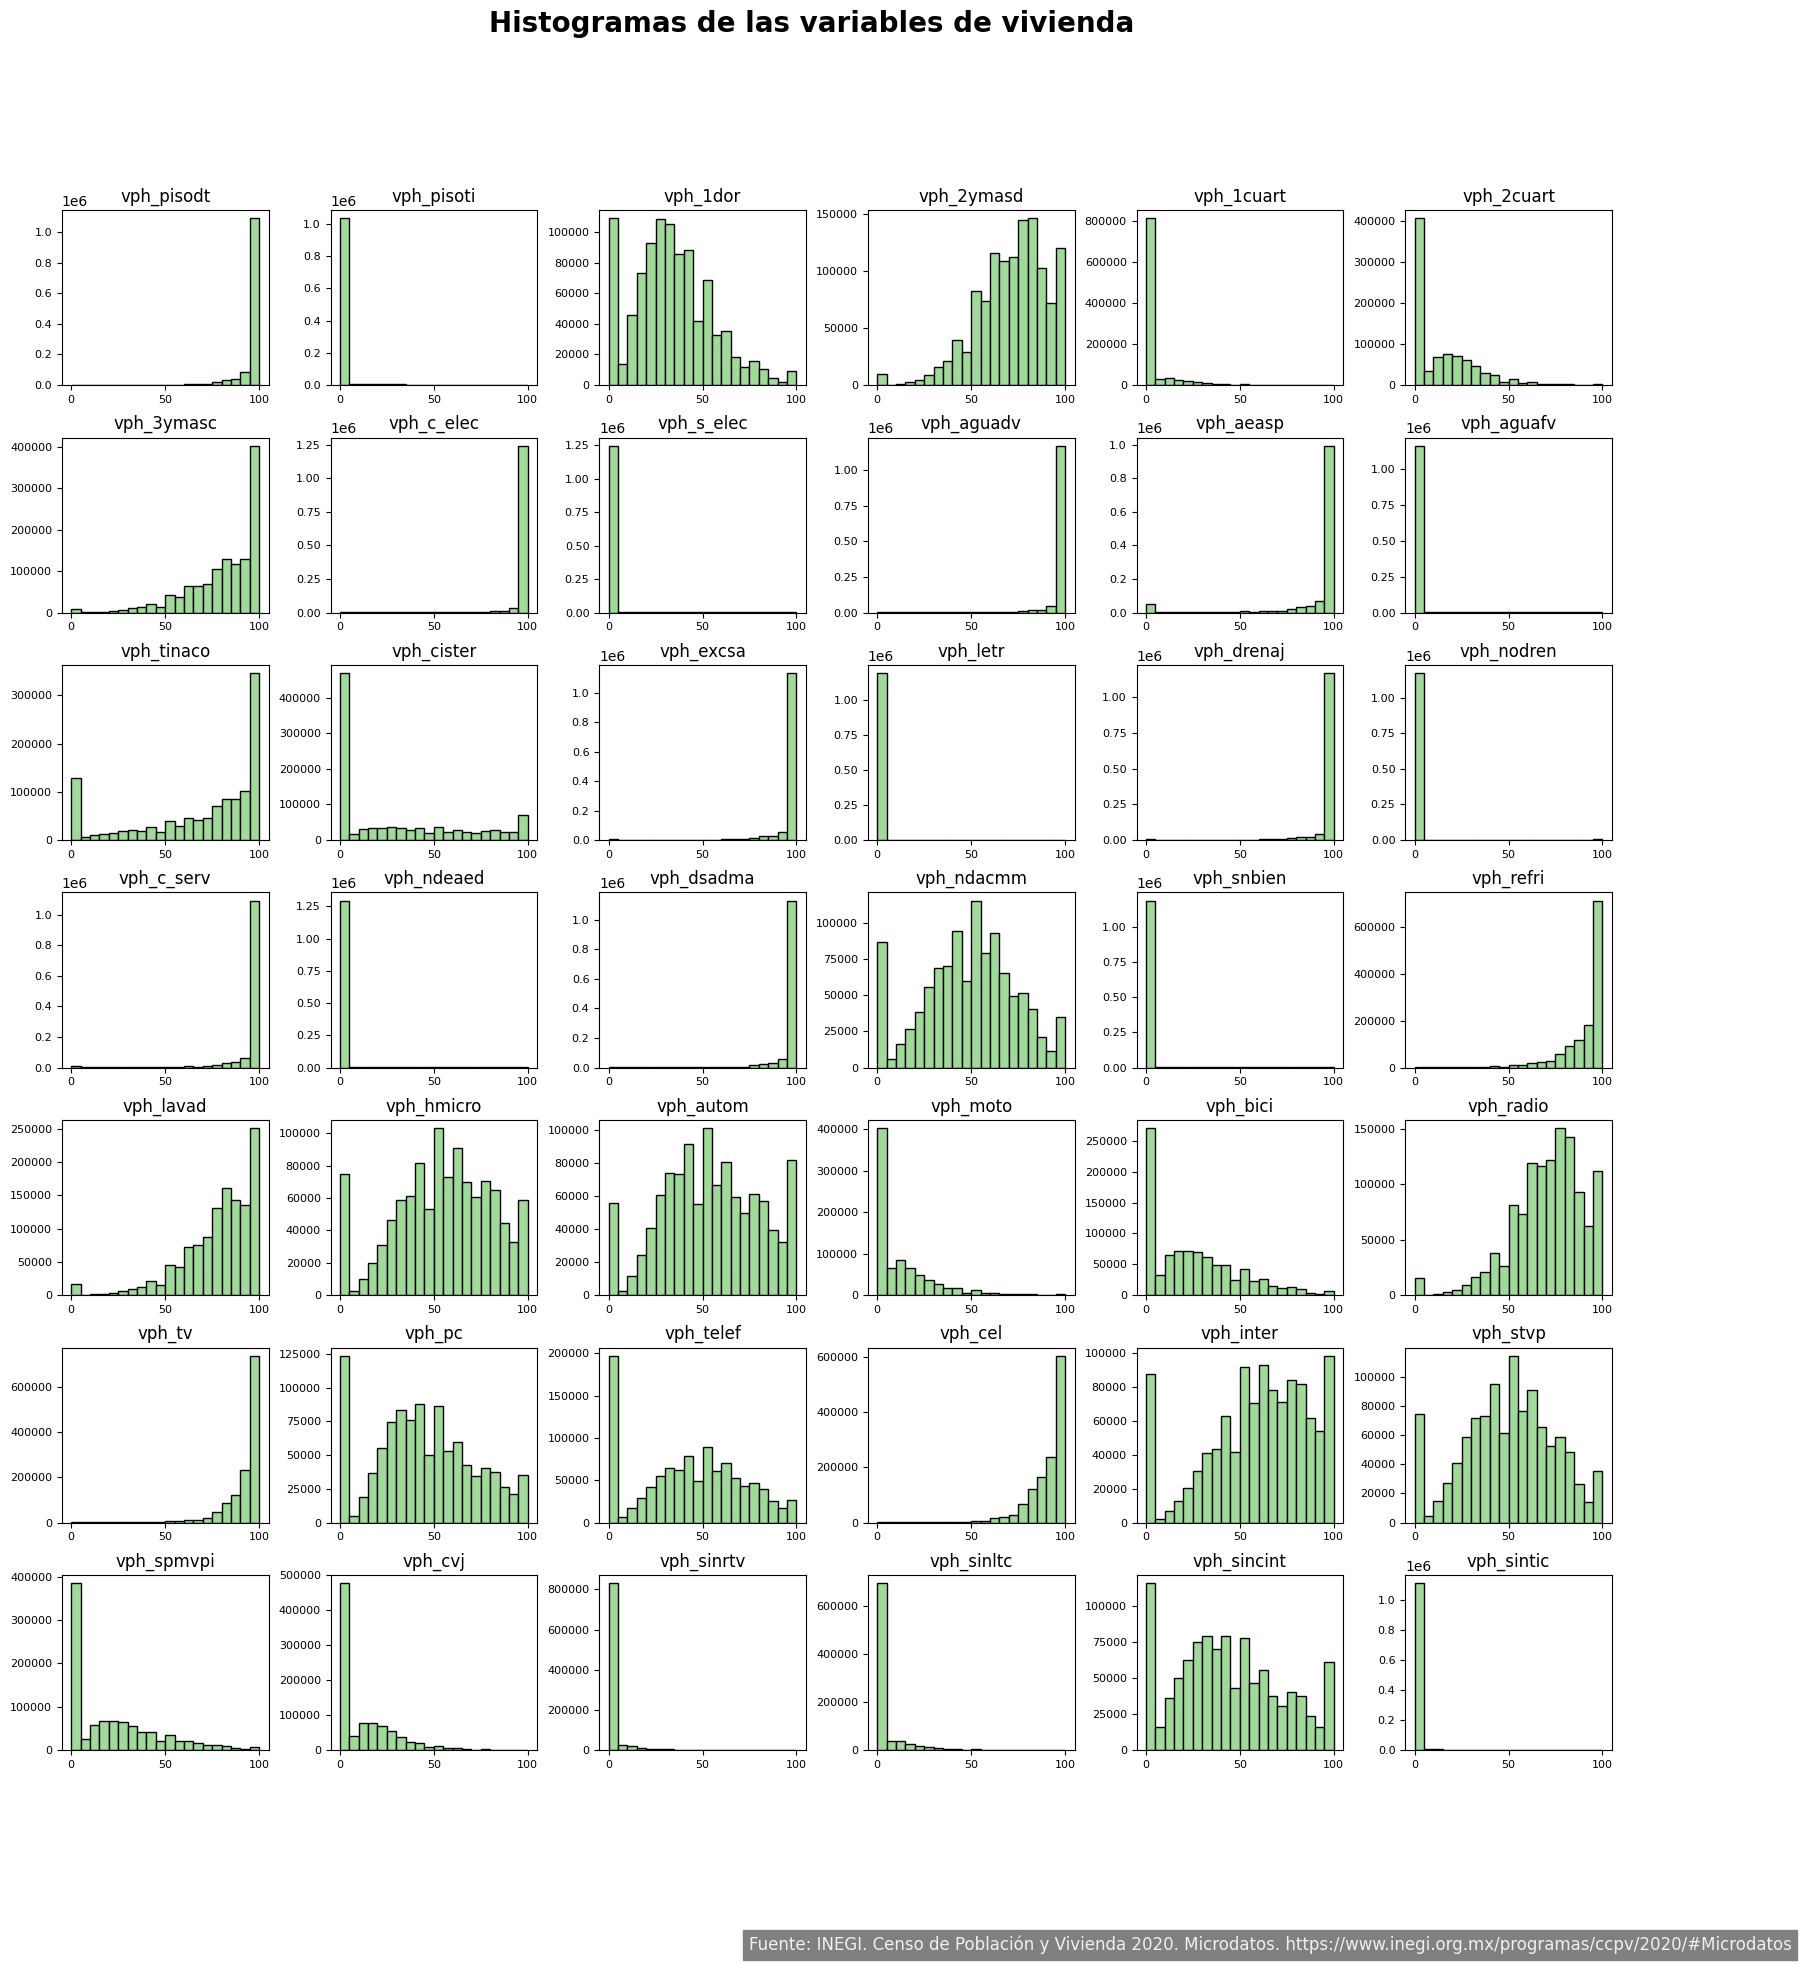

In [35]:
plt.rcParams['font.family'] = 'Century Gothic'
#Título de la figura
df_limpia.iloc[:,20:].hist(figsize=(20,20),bins=20, color='#a1d99b', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
#Titulo de la figura
plt.suptitle("Histogramas de las variables de vivienda", fontsize=20, fontweight='bold')

#Fuente
plt.figtext(0.99, 0.01, 'Fuente: INEGI. Censo de Población y Vivienda 2020. Microdatos. https://www.inegi.org.mx/programas/ccpv/2020/#Microdatos', horizontalalignment='right', fontsize=12, color='#f0f0f0', backgroundcolor='grey')

#### Función para descarga de imágenes satelitales

Para el proyecto, se utilizarán imágenes satelitales. Éstas se obtendrán de la plataforma de Google Earth Engine. Para poder descargarlas, se define un directorio en donde se descará la información.

In [36]:
#Crear carpeta para guardar las imágenes
if not os.path.exists('datos/imagenes'):
    os.makedirs('datos/imagenes')

Una vez que se cuenta con el directorio, se procede a definir la función que descargará la información. Esta función recibe como parámetros una lista de coordenadas que representan el área de interés, el rango de fechas en el que se desea obtener los datoz y el nomnbre del estado al que pertenecen las coordenadas:

In [37]:
def download_landsat_image(polygon_coords, start_date, end_date, state_name):
    #  Se incializa la API de Earth Engine
    ee.Initialize()

    # Polígono de interés

    polygon = ee.Geometry.Polygon(polygon_coords)

    # Colleción de imágenes de Landsat 8
    landsat = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA') \
                .filterDate(start_date, end_date) \
                .filterBounds(polygon) \
                .sort('CLOUD_COVER') \
                .first()

    # Parámetros de exportación. 
    export_params = {
        'image': landsat,
        'description': state_name +'Landsat_image',
        'scale': 30,
        'region': polygon
    }

    # Se genera la URL para descargar la imagen
    download_url = landsat.getDownloadURL(export_params)

    # Descarga de imagen
    r = requests.get(download_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(os.path.join(os.getcwd(),"datos/imagenes",state_name))


#### Ejemplo: Oaxaca

Si bien el preprocesamiento de las imágenes aún no se ha realizado, se puede observar que la información se descarga correctamente.

In [38]:
polygon_coords = [[[-96.503, 17.016], [-96.503, 17.019], [-96.497, 17.019], [-96.497, 17.016]]]
start_date = '2020-01-01'
end_date = '2020-12-31'

download_landsat_image(polygon_coords, start_date, end_date, 'Oaxaca')


RefreshError: ('invalid_grant: Token has been expired or revoked.', {'error': 'invalid_grant', 'error_description': 'Token has been expired or revoked.'})

In [ ]:
#Enlistar todas las imágenes
imagenes=[x for x in os.listdir('datos/imagenes/Oaxaca') if x.endswith('.tif')]
imagenes

['LC08_024048_20200423.B1.tif',
 'LC08_024048_20200423.B10.tif',
 'LC08_024048_20200423.B11.tif',
 'LC08_024048_20200423.B2.tif',
 'LC08_024048_20200423.B3.tif',
 'LC08_024048_20200423.B4.tif',
 'LC08_024048_20200423.B5.tif',
 'LC08_024048_20200423.B6.tif',
 'LC08_024048_20200423.B7.tif',
 'LC08_024048_20200423.B8.tif',
 'LC08_024048_20200423.B9.tif',
 'LC08_024048_20200423.BQA.tif']

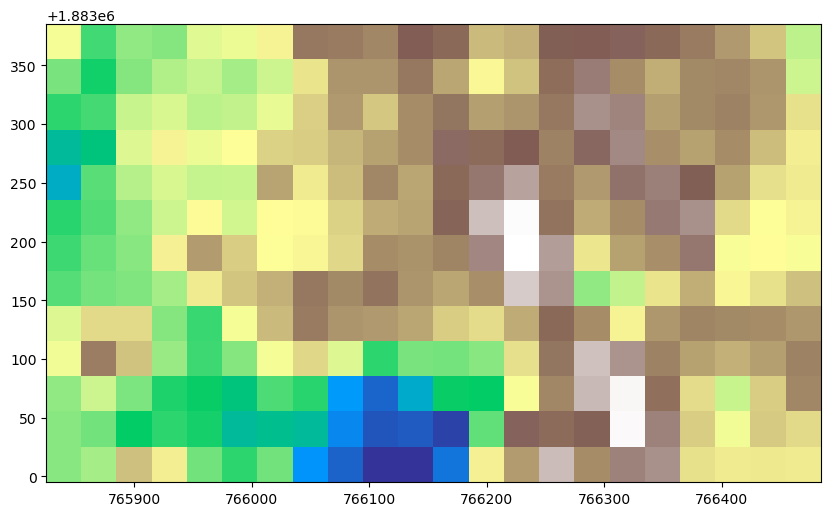

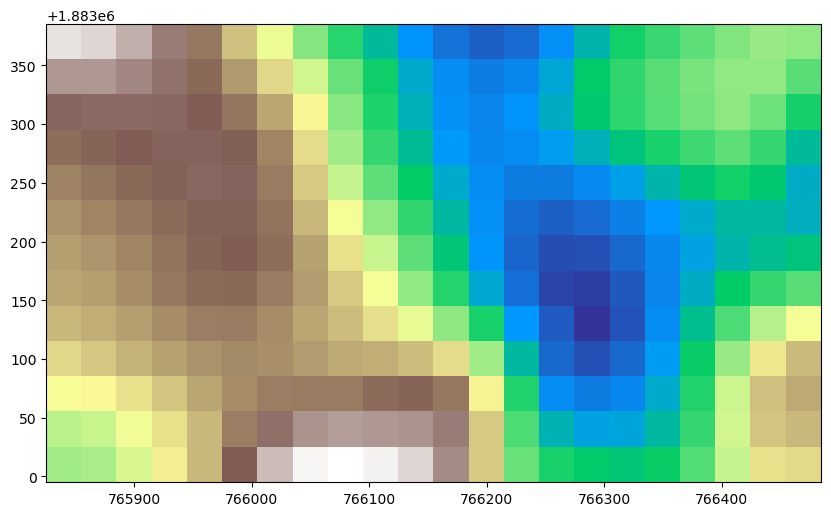

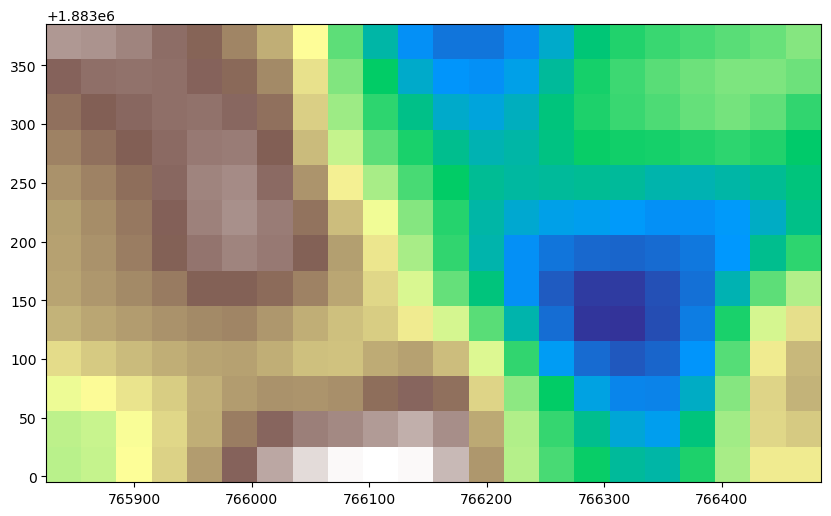

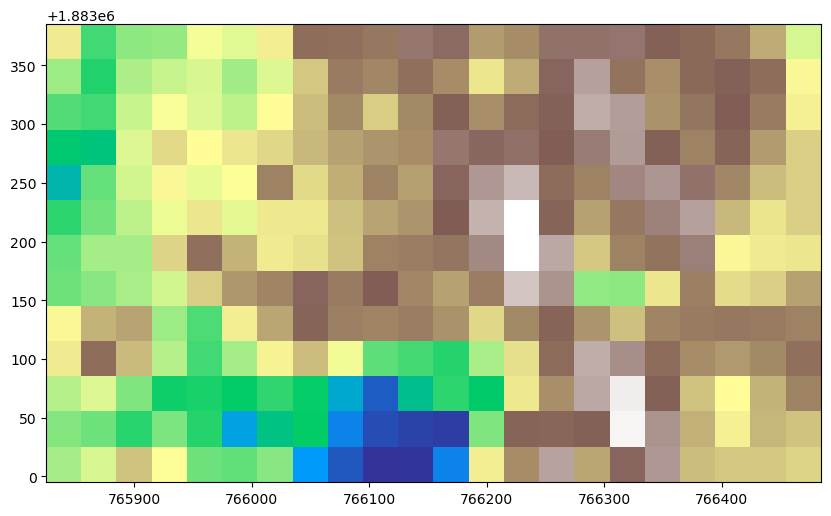

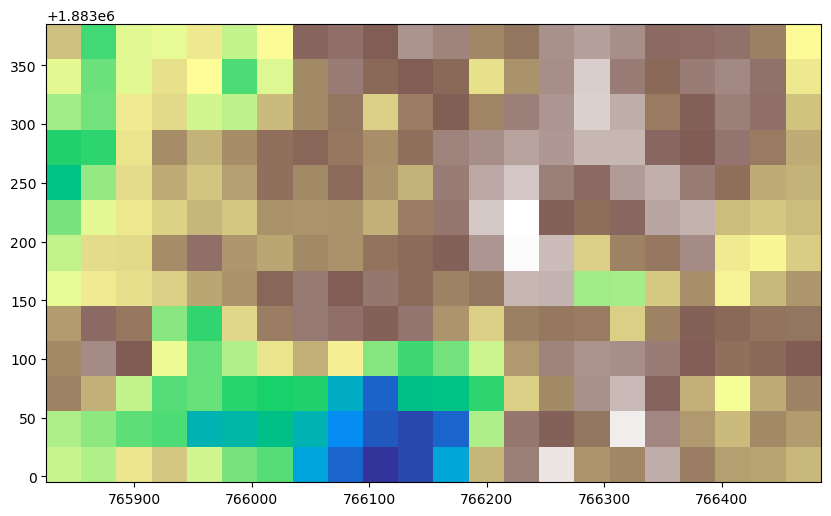

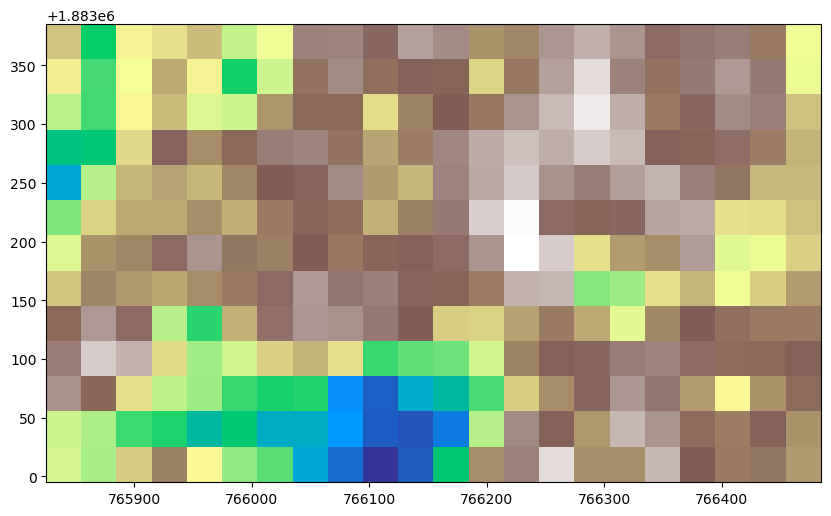

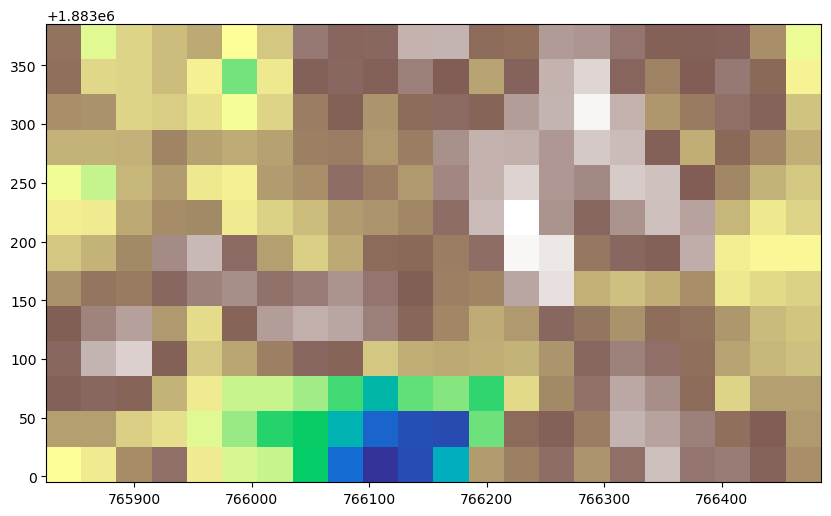

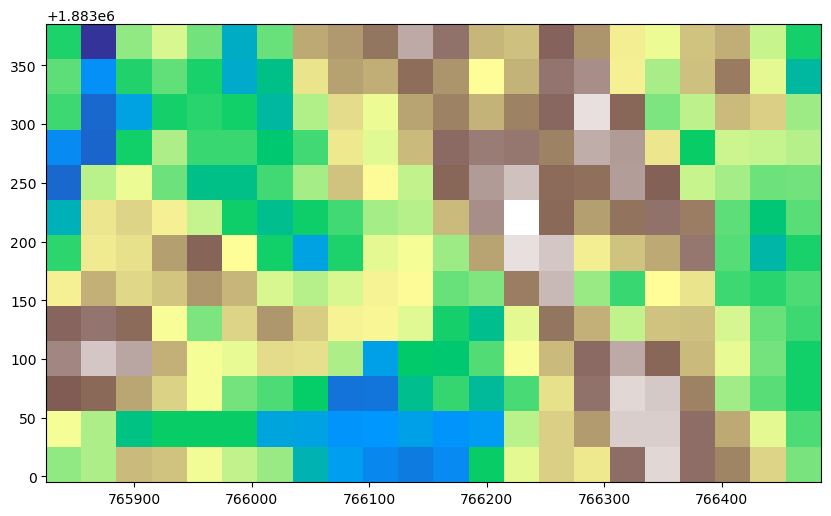

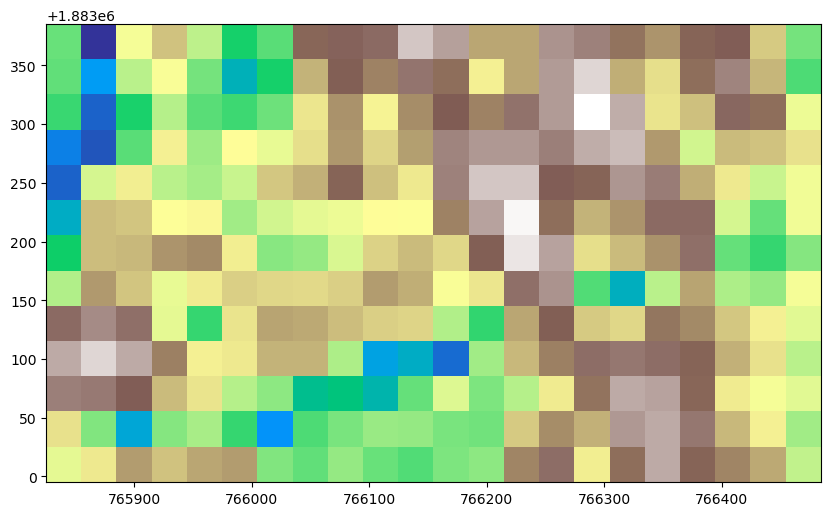

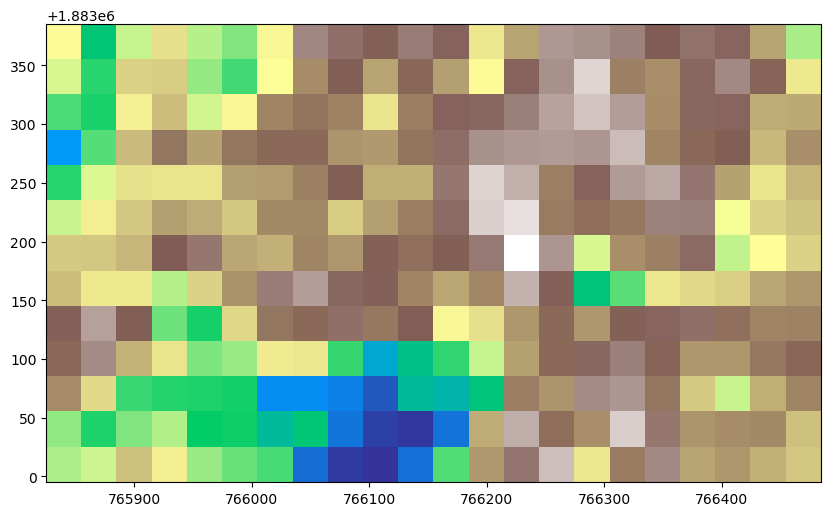

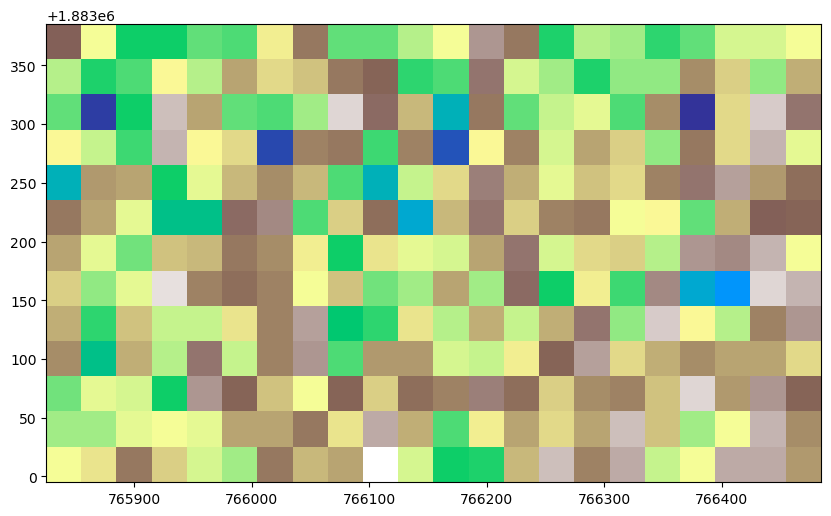

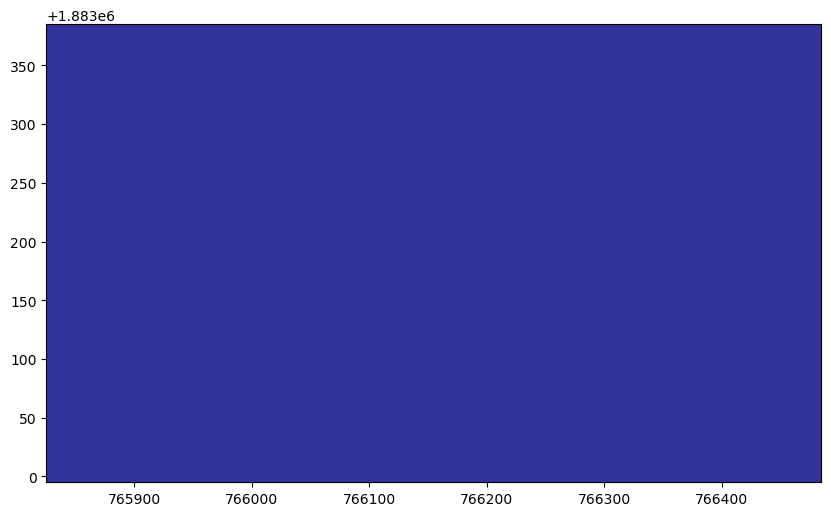

In [ ]:
#Graficar todas las imágenes
for imagen in imagenes:
    raster = rasterio.open("datos/imagenes/Oaxaca/"+imagen)
    fig, ax = plt.subplots(figsize=(10, 10))
    show(raster, ax=ax, cmap='terrain')
    plt.show()
